In [1]:
"""
CST8502 - Lab 5 Python
Decision Trees and kNN Classification on Titanic Dataset
"""

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [11]:
# ============================================================================
# STEP 1: Random seed
# ============================================================================
# Explanation: Set random seeds for reproducible results.
random.seed(2025)
np.random.seed(2025)

In [12]:
# ============================================================================
# STEP 2: Load data and print stats
# ============================================================================
# Explanation: Load dataset and display basic statistics (instances and attributes count).
df = pd.read_csv('Titanic.csv')
print(f"Number of instances: {len(df)}")
print(f"Number of attributes: {len(df.columns)}")
print("\nFirst 5 instances:")
print(df.head())

Number of instances: 889
Number of attributes: 12

First 5 instances:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                          'Braund, Mr. Owen Harris'    male  22.0      1   
1  'Cumings, Mrs. John Bradley (Florence Briggs T...  female  38.0      1   
2                           'Heikkinen, Miss. Laina'  female  26.0      0   
3     'Futrelle, Mrs. Jacques Heath (Lily May Peel)'  female  35.0      1   
4                         'Allen, Mr. William Henry'    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C

In [113]:
# ============================================================================
# STEP 3: Quality check
# ============================================================================
# Explanation: Check missing values and remove irrelevant columns (PassengerId, Name, Ticket, Cabin).
print("Missing values in original dataset:")
print(df.isnull().sum())

# Remove irrelevant columns: PassengerId, Name, Ticket, Cabin
# Keep: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Survived
df_dt = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].copy()

Missing values in original dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [114]:
# ============================================================================
# STEP 4: Creation of new columns
# ============================================================================
# Explanation: Create categorical features (AgeGroup, RelativesCategory, FareCategory) from numerical data.
# AgeGroup: NK (missing), Baby (<3), Child (3-12), Teen (13-19), Adult (20-60), Senior (60+)
def get_age_group(age):
    if pd.isna(age):
        return 'NK'
    elif age < 3:
        return 'Baby'
    elif age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df_dt['AgeGroup'] = df_dt['Age'].apply(get_age_group)

# Relatives: Total of SibSp (siblings/spouses) and Parch (parents/children)
df_dt['Relatives'] = df_dt['SibSp'] + df_dt['Parch']

# RelativesCategory: None (0), One (1), Few (2-4), Many (5+)
def get_relatives_category(relatives):
    if relatives == 0:
        return 'None'
    elif relatives == 1:
        return 'One'
    elif relatives < 5:
        return 'Few'
    else:
        return 'Many'

df_dt['RelativesCategory'] = df_dt['Relatives'].apply(get_relatives_category)

# Fare categories: Free (0), Low (<50), Average (<100), High (>=100)
def get_fare_category(fare):
    if pd.isna(fare) or fare == 0:
        return 'Free'
    elif fare < 50:
        return 'Low'
    elif fare < 100:
        return 'Average'
    else:
        return 'High'

df_dt['FareCategory'] = df_dt['Fare'].apply(get_fare_category)

In [115]:
# ============================================================================
# STEP 5: First 5 rows
# ============================================================================
# Explanation: Display first 5 rows with final selected categorical features.
# Select final attributes: Pclass, Sex, AgeGroup, RelativesCategory, FareCategory, Embarked, Survived
df_dt_final = df_dt[['Pclass', 'Sex', 'AgeGroup', 'RelativesCategory', 'FareCategory', 'Embarked', 'Survived']].copy()
print("First 5 rows with selected attributes:")
print(df_dt_final.head())

First 5 rows with selected attributes:
   Pclass     Sex AgeGroup RelativesCategory FareCategory Embarked  Survived
0       3    male    Adult               One          Low        S         0
1       1  female    Adult               One      Average        C         1
2       3  female    Adult              None          Low        S         1
3       1  female    Adult               One      Average        S         1
4       3    male    Adult              None          Low        S         0


In [116]:
# ============================================================================
# STEP 6: One-hot encoding
# ============================================================================
# Explanation: Convert categorical variables to binary columns (0/1) for decision tree input.
# Separate features and target
X_dt = df_dt_final.drop('Survived', axis=1)
y_dt = df_dt_final['Survived']

# Apply one-hot encoding
X_dt_encoded = pd.get_dummies(X_dt, columns=['Pclass', 'Sex', 'AgeGroup', 'RelativesCategory', 'FareCategory', 'Embarked'], drop_first=False)


In [117]:
# ============================================================================
# STEP 7: Train-test split
# ============================================================================
# Explanation: Split data into 80% training and 20% testing sets with stratification.
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt_encoded, y_dt, test_size=0.2, random_state=2025, stratify=y_dt
)

In [ ]:
# ============================================================================
# STEP 8: Model fitting
# ============================================================================
# Explanation: Train decision tree classifier; tree depth and leaves show model complexity.
dt_classifier = DecisionTreeClassifier(random_state=2025)
dt_classifier.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=2025)

Accuracy: 0.8034

Confusion Matrix:
                Predicted
              Not Survived  Survived
Not Survived        98        12
Survived            23        45


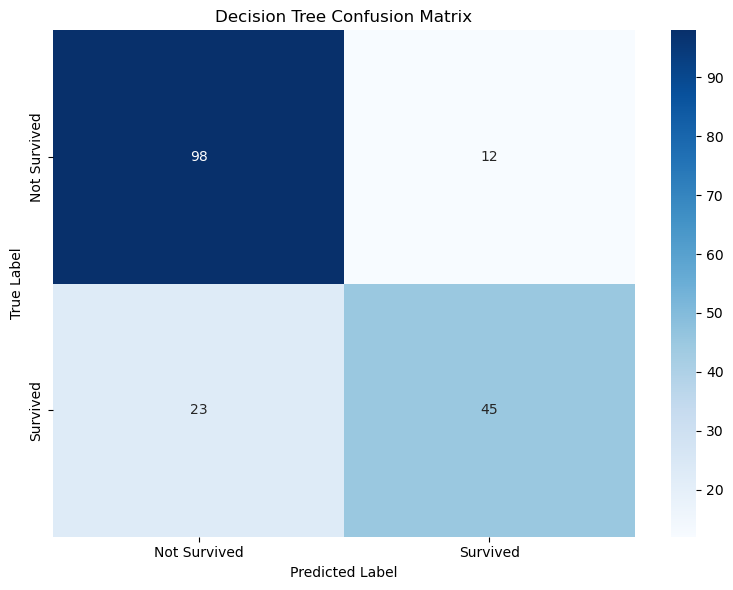

In [119]:
# ============================================================================
# STEP 9: Prediction, accuracy, confusion matrix
# ============================================================================
# Explanation: Evaluate model performance using accuracy and confusion matrix (TP, FP, TN, FN).
y_pred_dt = dt_classifier.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.4f}")
print("\nConfusion Matrix:")
print("                Predicted")
print("              Not Survived  Survived")
print(f"Not Survived      {cm_dt[0,0]:4d}      {cm_dt[0,1]:4d}")
print(f"Survived          {cm_dt[1,0]:4d}      {cm_dt[1,1]:4d}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

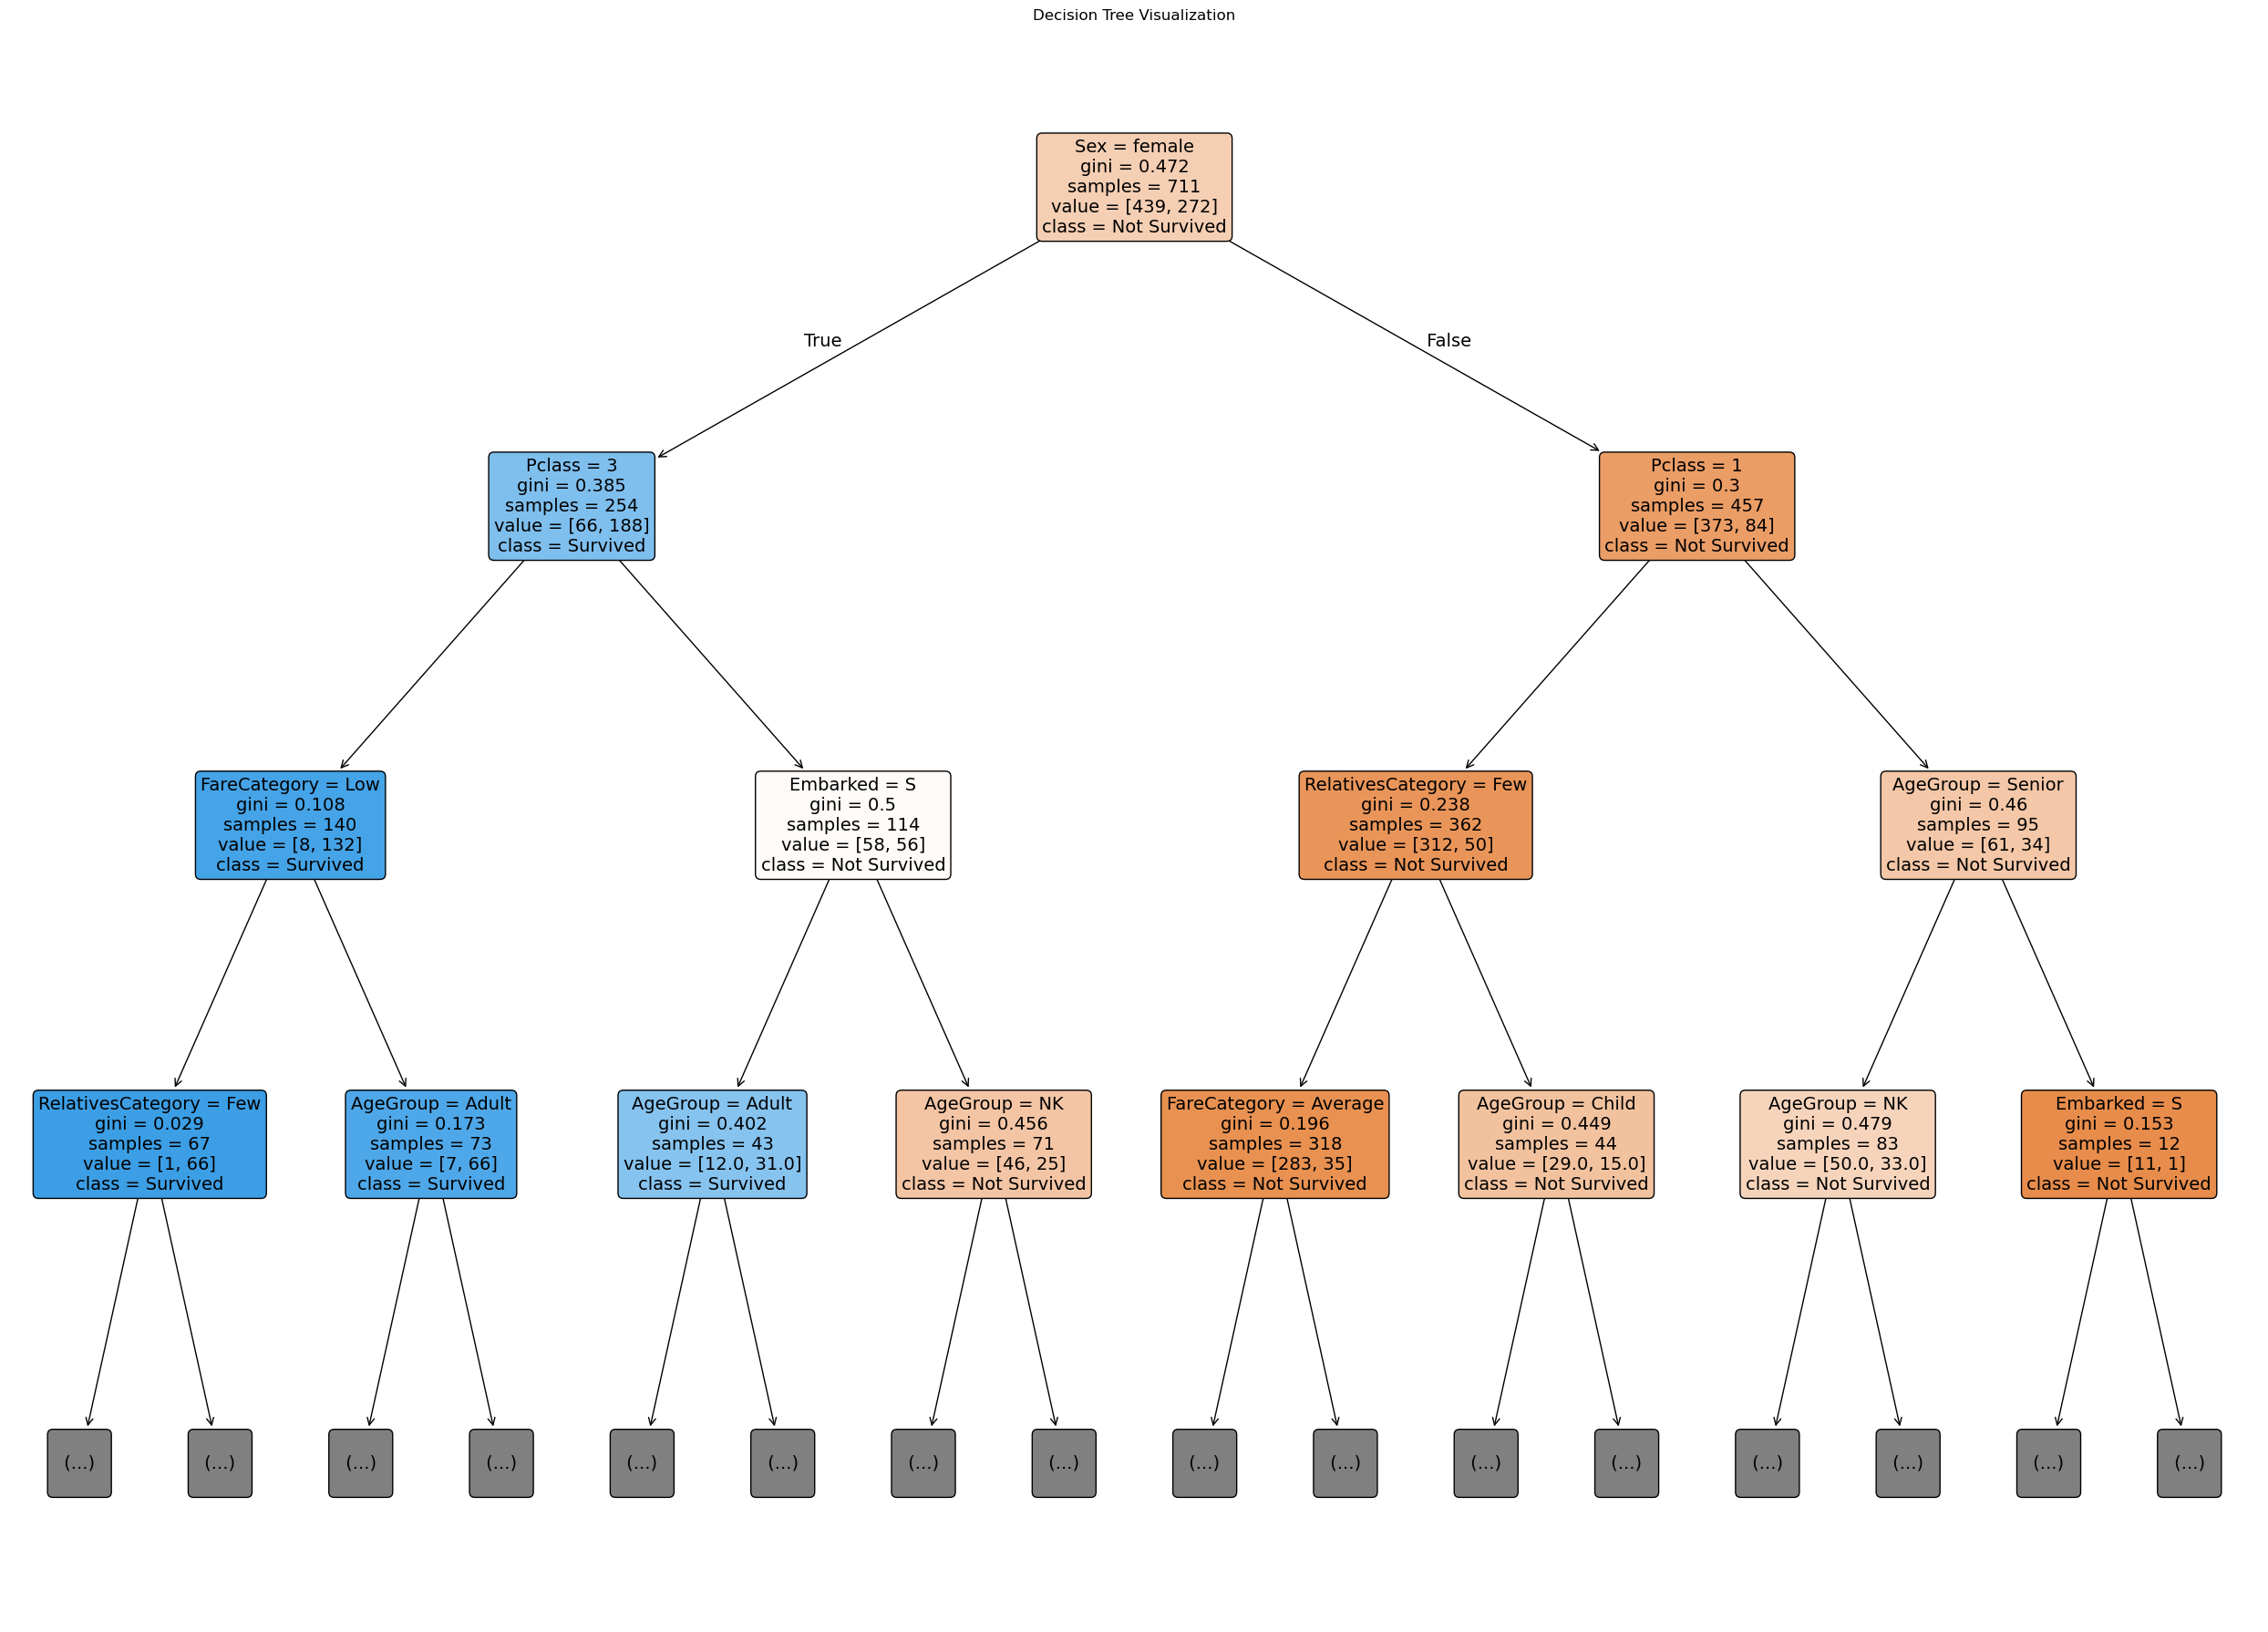

In [120]:
# ============================================================================
# STEP 10: Tree
# ============================================================================
# Explanation: Visualize decision tree structure
# Create label mapping dictionary for readable decision tree display.
def create_label_mapping(feature_names):
    label_mapping = {}
    for feature_name in feature_names:
        if '_' in feature_name:
            parts = feature_name.split('_')
            if len(parts) >= 2:
                base_feature = parts[0]
                value = '_'.join(parts[1:])

                # For Sex feature, handle special case
                if base_feature == 'Sex':
                    if value == 'male':
                        label_mapping[f'{feature_name} <= 0.5'] = 'Sex = female'
                        label_mapping[f'{feature_name} > 0.5'] = 'Sex = male'
                    elif value == 'female':
                        label_mapping[f'{feature_name} <= 0.5'] = 'Sex = male'
                        label_mapping[f'{feature_name} > 0.5'] = 'Sex = female'
                else:
                    # For other features: Pclass, AgeGroup, RelativesCategory, FareCategory, Embarked
                    # For one-hot encoding: <= 0.5 means IS this category, > 0.5 means NOT this category
                    label_mapping[f'{feature_name} <= 0.5'] = f'{base_feature} = {value}'
                    label_mapping[f'{feature_name} > 0.5'] = f'{base_feature} != {value}'
    return label_mapping

label_mapping = create_label_mapping(X_dt_encoded.columns)

# Replace encoded feature labels in decision tree visualization with readable labels.
def replace_tree_labels(label_mapping):
    ax = plt.gca()
    for text in ax.texts:
        content = text.get_text()
        if content and ('<=' in content or '>' in content):
            lines = content.split('\n')
            if lines and ('<=' in lines[0] or '>' in lines[0]):
                first_line = lines[0].strip()

                # Handle <= condition
                if '<=' in first_line:
                    parts = first_line.split(' <= ')
                    if len(parts) == 2:
                        feature_part = parts[0].strip()
                        key = f'{feature_part} <= 0.5'
                        if key in label_mapping:
                            lines[0] = label_mapping[key]
                            text.set_text('\n'.join(lines))

                # Handle > condition
                elif '>' in first_line:
                    parts = first_line.split(' > ')
                    if len(parts) == 2:
                        feature_part = parts[0].strip()
                        key = f'{feature_part} > 0.5'
                        if key in label_mapping:
                            lines[0] = label_mapping[key]
                            text.set_text('\n'.join(lines))

plt.figure(figsize=(25, 18))
plot_tree(dt_classifier,
          feature_names=X_dt_encoded.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=14,
          max_depth=3)

# Replace labels using mapping dictionary
replace_tree_labels(label_mapping)

plt.title('Decision Tree Visualization')
plt.tight_layout()
plt.show()

In [121]:
# ============================================================================
# STEP 11: 5 rules
# ============================================================================
# Explanation: Extract and print 5 IF-THEN rules from the decision tree

# Export tree as text
tree_rules = export_text(dt_classifier,
                         feature_names=list(X_dt_encoded.columns),
                         spacing=2,
                         decimals=3)
# print(tree_rules)

# Extract and print 5 IF-THEN rules
print("\n" + "="*70)
print("5 IF-THEN RULES EXTRACTED FROM DECISION TREE:")
print("="*70)

rules = [
    "Rule 1: IF Sex = female AND Pclass = 3 AND FareCategory = Low AND RelativesCategory = Few THEN Survived",
    "Rule 2: IF Sex = female AND Pclass = 3 AND FareCategory != Low AND AgeGroup = Adult THEN Survived",
    "Rule 3: IF Sex = female AND Pclass != 3 AND Embarked != S AND AgeGroup = NK THEN Not Survived",
    "Rule 4: IF Sex = male AND Pclass = 1 AND RelativesCategory = Few AND FareCategory = Average THEN Not Survived",
    "Rule 5: IF Sex = male AND Pclass = 1 AND RelativesCategory != Few AND AgeGroup = Child THEN Not Survived"
]

for rule in rules:
    print(rule)

print("="*70)


5 IF-THEN RULES EXTRACTED FROM DECISION TREE:
Rule 1: IF Sex = female AND Pclass = 3 AND FareCategory = Low AND RelativesCategory = Few THEN Survived
Rule 2: IF Sex = female AND Pclass = 3 AND FareCategory != Low AND AgeGroup = Adult THEN Survived
Rule 3: IF Sex = female AND Pclass != 3 AND Embarked != S AND AgeGroup = NK THEN Not Survived
Rule 4: IF Sex = male AND Pclass = 1 AND RelativesCategory = Few AND FareCategory = Average THEN Not Survived
Rule 5: IF Sex = male AND Pclass = 1 AND RelativesCategory != Few AND AgeGroup = Child THEN Not Survived


In [122]:
# ============================================================================
# STEP 12: Data prep for distance-based approach
# ============================================================================
# Explanation: Prepare data for distance-based kNN approach by creating Relatives feature (SibSp + Parch) and splitting into train/test sets.
df_knn = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived', 'Name']].copy()
df_knn['Relatives'] = df_knn['SibSp'] + df_knn['Parch']
df_knn = df_knn[['Pclass', 'Sex', 'Age', 'Relatives', 'Fare', 'Embarked', 'Survived', 'Name']].copy()

X_knn = df_knn.drop('Survived', axis=1)
y_knn = df_knn['Survived']
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=2025, stratify=y_knn
)

In [123]:
# ============================================================================
# STEP 13: Handle missing age
# ============================================================================
# Explanation: Extract Title from Name, calculate title-based age averages using training set only, replace missing Age values with these averages, then remove Name and Title columns from feature set.
def extract_title(name):
    if pd.isna(name):
        return 'Unknown'
    try:
        return str(name).strip("'\"").split(',')[1].split('.')[0].strip()
    except Exception:
        return 'Unknown'

# Extract Title from Name
X_train_knn['Title'] = X_train_knn['Name'].apply(extract_title)
X_test_knn['Title'] = X_test_knn['Name'].apply(extract_title)

# Calculate title-based age averages using only training set (to avoid data leakage)
title_avg_ages = X_train_knn[X_train_knn['Age'].notna()].groupby('Title')['Age'].mean()

# Replace missing ages with title-based averages (use training set statistics only)
# For training set
X_train_knn['Age'] = X_train_knn['Age'].fillna(X_train_knn['Title'].map(title_avg_ages))

# For test set: use training set's title averages
X_test_knn['Age'] = X_test_knn['Age'].fillna(X_test_knn['Title'].map(title_avg_ages))

# Drop Name and Title columns (no longer needed)
X_train_knn = X_train_knn.drop(['Name', 'Title'], axis=1)
X_test_knn = X_test_knn.drop(['Name', 'Title'], axis=1)

In [124]:
# ============================================================================
# STEP 14: Scaling
# ============================================================================
# Explanation: Normalize numerical features (mean=0, std=1) for kNN distance calculations.
numerical_cols = ['Age', 'Relatives', 'Fare']

# Check for any remaining missing values
for col in numerical_cols:
    missing_train = X_train_knn[col].isnull().sum()
    missing_test = X_test_knn[col].isnull().sum()
    if missing_train > 0 or missing_test > 0:
        median_val = X_train_knn[col].median()
        X_train_knn[col] = X_train_knn[col].fillna(median_val)
        X_test_knn[col] = X_test_knn[col].fillna(median_val)

# Fit scaler on training set
scaler = StandardScaler()
X_train_knn[numerical_cols] = scaler.fit_transform(X_train_knn[numerical_cols])

# Apply scaler to test set
X_test_knn[numerical_cols] = scaler.transform(X_test_knn[numerical_cols])

In [125]:
# ============================================================================
# STEP 15: One-hot encoding
# ============================================================================
# Explanation: Convert categorical variables to binary format for kNN numerical input.
categorical_cols_knn = ['Pclass', 'Sex', 'Embarked']

# Handle missing values in categorical columns
for col in categorical_cols_knn:
    missing_train = X_train_knn[col].isnull().sum()
    missing_test = X_test_knn[col].isnull().sum()
    if missing_train > 0 or missing_test > 0:
        mode_val = X_train_knn[col].mode()[0] if len(X_train_knn[col].mode()) > 0 else 'Unknown'
        X_train_knn[col] = X_train_knn[col].fillna(mode_val)
        X_test_knn[col] = X_test_knn[col].fillna(mode_val)

# Apply one-hot encoding
X_train_knn_encoded = pd.get_dummies(X_train_knn, columns=categorical_cols_knn, drop_first=False)
X_test_knn_encoded = pd.get_dummies(X_test_knn, columns=categorical_cols_knn, drop_first=False)

# Ensure both have same columns (in case test set missing some categories)
all_cols = set(X_train_knn_encoded.columns) | set(X_test_knn_encoded.columns)
for col in all_cols:
    if col not in X_train_knn_encoded.columns:
        X_train_knn_encoded[col] = 0
    if col not in X_test_knn_encoded.columns:
        X_test_knn_encoded[col] = 0

# Reorder columns to match
X_test_knn_encoded = X_test_knn_encoded[X_train_knn_encoded.columns]

Accuracy: 0.8202

Confusion Matrix:
                Predicted
              Not Survived  Survived
Not Survived        98        12
Survived            20        48


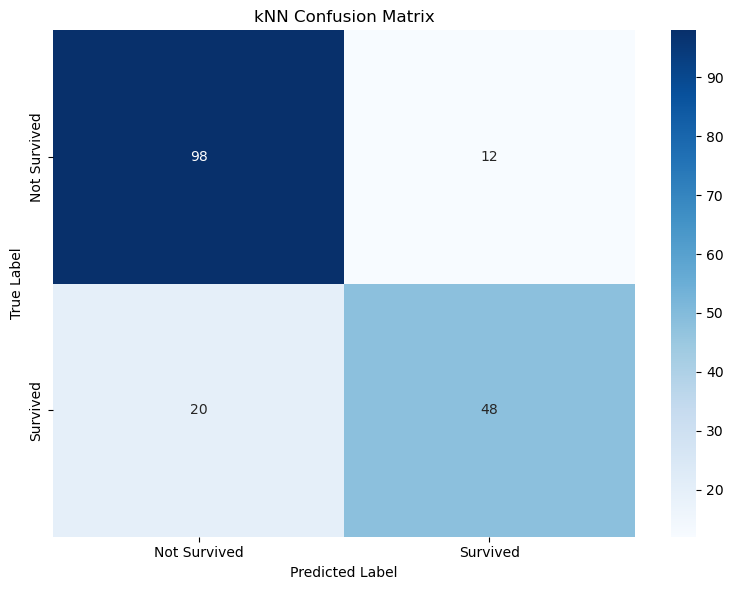

In [126]:
# ============================================================================
# STEP 16: kNN fit & predict
# ============================================================================
# Explanation: Train kNN classifier (k=5) using nearest neighbors with majority vote.
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_knn_encoded, y_train_knn)

y_pred_knn = knn_classifier.predict(X_test_knn_encoded)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.4f}")
print("\nConfusion Matrix:")
print("                Predicted")
print("              Not Survived  Survived")
print(f"Not Survived      {cm_knn[0,0]:4d}      {cm_knn[0,1]:4d}")
print(f"Survived          {cm_knn[1,0]:4d}      {cm_knn[1,1]:4d}")
# Results: kNN performance compared to decision tree (different classification approaches).

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('kNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Accuracy: 0.8034

Confusion Matrix:
                Predicted
              Not Survived  Survived
Not Survived       100        10
Survived            25        43


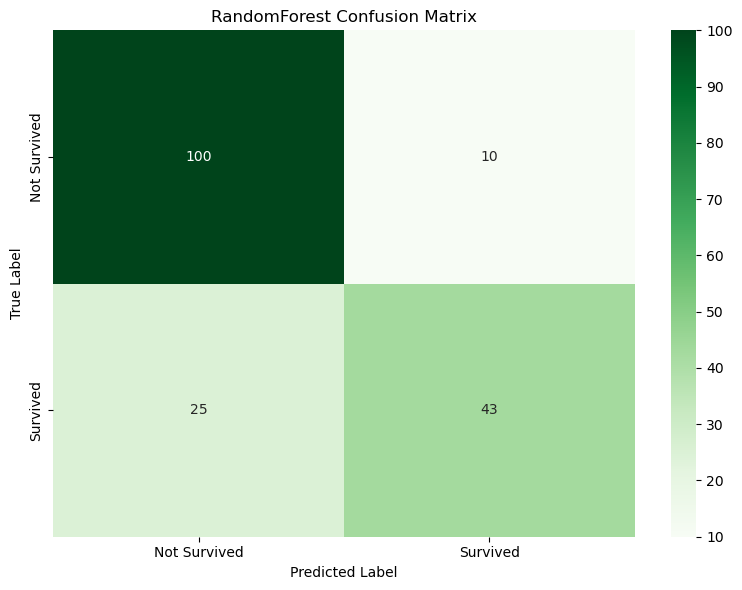

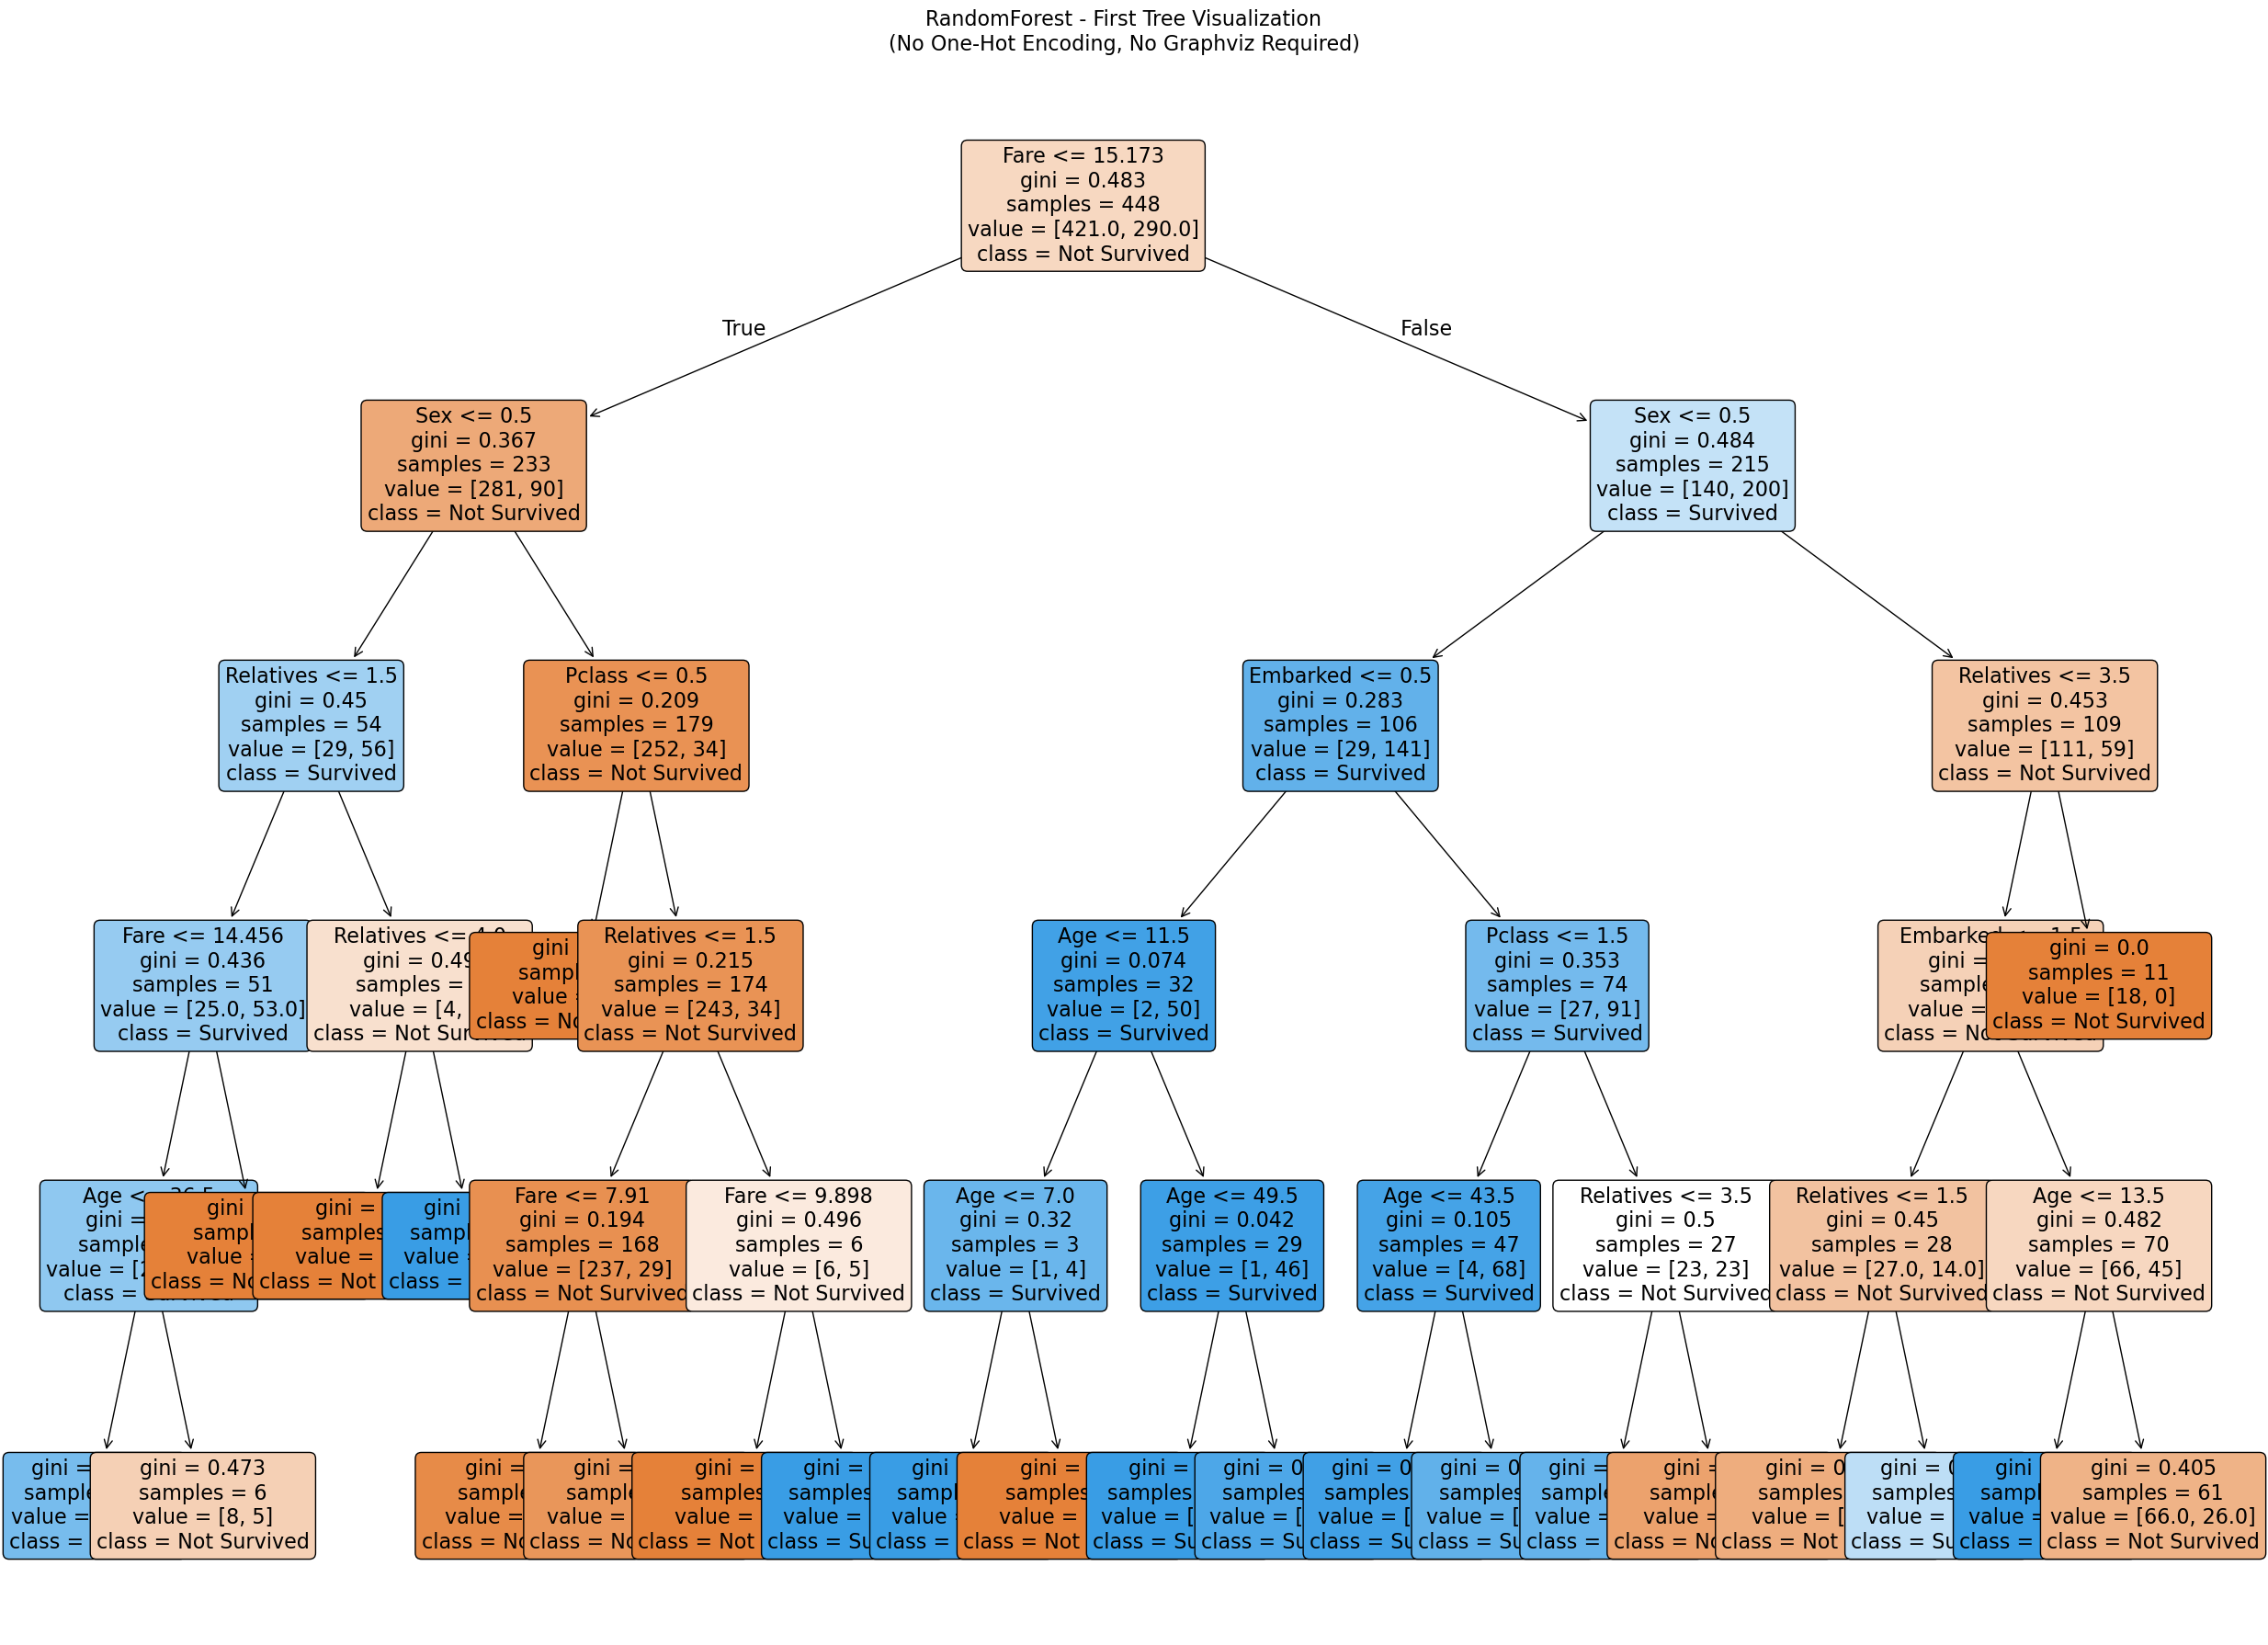


Note: This shows the first tree from RandomForest ensemble.
RandomForest uses multiple trees and averages their predictions.
This approach uses OrdinalEncoder (not one-hot encoding) and
can visualize directly with matplotlib (no Graphviz installation needed).


In [129]:
# ============================================================================
# STEP 17: Bonus
# ============================================================================
# Explanation: Use RandomForestClassifier - an ensemble of decision trees.
# Different from STEP 8's DecisionTreeClassifier (which uses a single tree).
# RandomForest handles categorical features using OrdinalEncoder (no one-hot encoding needed).
# Can visualize trees directly with matplotlib (no Graphviz needed).

# ------------------------------------------------------------------------
# STEP 17.1: Prepare data and create Relatives feature
# ------------------------------------------------------------------------
df_bonus = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived', 'Name']].copy()
df_bonus['Relatives'] = df_bonus['SibSp'] + df_bonus['Parch']
df_bonus = df_bonus[['Pclass', 'Sex', 'Age', 'Relatives', 'Fare', 'Embarked', 'Survived', 'Name']].copy()

# ------------------------------------------------------------------------
# STEP 17.2: Split into train/test sets FIRST (to avoid data leakage)
# ------------------------------------------------------------------------
X_bonus = df_bonus.drop('Survived', axis=1)
y_bonus = df_bonus['Survived']
X_train_bonus, X_test_bonus, y_train_bonus, y_test_bonus = train_test_split(
    X_bonus, y_bonus, test_size=0.2, random_state=2025, stratify=y_bonus
)

# ------------------------------------------------------------------------
# STEP 17.3: Handle missing age
# ------------------------------------------------------------------------
def extract_title(name):
    if pd.isna(name):
        return 'Unknown'
    try:
        return str(name).strip("'\"").split(',')[1].split('.')[0].strip()
    except Exception:
        return 'Unknown'

# Extract Title from Name
X_train_bonus['Title'] = X_train_bonus['Name'].apply(extract_title)
X_test_bonus['Title'] = X_test_bonus['Name'].apply(extract_title)

# Calculate title-based age averages using only training set (to avoid data leakage)
title_avg_ages = X_train_bonus[X_train_bonus['Age'].notna()].groupby('Title')['Age'].mean()

# Replace missing ages with title-based averages (use training set statistics only)
# For training set
X_train_bonus['Age'] = X_train_bonus['Age'].fillna(X_train_bonus['Title'].map(title_avg_ages))

# For test set: use training set's title averages
X_test_bonus['Age'] = X_test_bonus['Age'].fillna(X_test_bonus['Title'].map(title_avg_ages))

# Drop Name and Title columns (no longer needed)
X_train_bonus = X_train_bonus.drop(['Name', 'Title'], axis=1)
X_test_bonus = X_test_bonus.drop(['Name', 'Title'], axis=1)

# ------------------------------------------------------------------------
# STEP 17.4: Handle other missing values
# ------------------------------------------------------------------------
# Check for any remaining missing values
numerical_cols = ['Age', 'Relatives', 'Fare']
categorical_cols = ['Pclass', 'Sex', 'Embarked']

for col in numerical_cols:
    missing_train = X_train_bonus[col].isnull().sum()
    missing_test = X_test_bonus[col].isnull().sum()
    if missing_train > 0 or missing_test > 0:
        median_val = X_train_bonus[col].median()
        X_train_bonus[col] = X_train_bonus[col].fillna(median_val)
        X_test_bonus[col] = X_test_bonus[col].fillna(median_val)

for col in categorical_cols:
    missing_train = X_train_bonus[col].isnull().sum()
    missing_test = X_test_bonus[col].isnull().sum()
    if missing_train > 0 or missing_test > 0:
        mode_val = X_train_bonus[col].mode()[0] if len(X_train_bonus[col].mode()) > 0 else 'Unknown'
        X_train_bonus[col] = X_train_bonus[col].fillna(mode_val)
        X_test_bonus[col] = X_test_bonus[col].fillna(mode_val)

# ------------------------------------------------------------------------
# STEP 17.5: Encode categorical features using OrdinalEncoder (not one-hot)
# ------------------------------------------------------------------------
# Separate numerical and categorical features
X_train_num = X_train_bonus[numerical_cols].copy()
X_train_cat = X_train_bonus[categorical_cols].copy()
X_test_num = X_test_bonus[numerical_cols].copy()
X_test_cat = X_test_bonus[categorical_cols].copy()

# Apply OrdinalEncoder to categorical features (preserves single column per feature)
encoder = OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Convert back to DataFrame
X_train_cat_encoded = pd.DataFrame(
    X_train_cat_encoded,
    columns=categorical_cols,
    index=X_train_cat.index
)
X_test_cat_encoded = pd.DataFrame(
    X_test_cat_encoded,
    columns=categorical_cols,
    index=X_test_cat.index
)

# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_encoded], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_encoded], axis=1)

# ------------------------------------------------------------------------
# STEP 17.6: Model training and evaluation
# ------------------------------------------------------------------------
# RandomForest: ensemble of decision trees (different from STEP 8's single DecisionTree)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2025, n_jobs=-1)
rf_model.fit(X_train_final, y_train_bonus)

y_pred_bonus = rf_model.predict(X_test_final)
accuracy_bonus = accuracy_score(y_test_bonus, y_pred_bonus)
cm_bonus = confusion_matrix(y_test_bonus, y_pred_bonus)

print(f"Accuracy: {accuracy_bonus:.4f}")
print("\nConfusion Matrix:")
print("                Predicted")
print("              Not Survived  Survived")
print(f"Not Survived      {cm_bonus[0,0]:4d}      {cm_bonus[0,1]:4d}")
print(f"Survived          {cm_bonus[1,0]:4d}      {cm_bonus[1,1]:4d}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bonus, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('RandomForest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# STEP 17.7: Visualize tree (using matplotlib, no Graphviz needed)
# ------------------------------------------------------------------------
# Visualize the first tree from the RandomForest ensemble
plt.figure(figsize=(25, 18))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train_final.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=16,
          max_depth=5)
plt.title('RandomForest - First Tree Visualization\n(No One-Hot Encoding, No Graphviz Required)',
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nNote: This shows the first tree from RandomForest ensemble.")
print("RandomForest uses multiple trees and averages their predictions.")
print("This approach uses OrdinalEncoder (not one-hot encoding) and")
print("can visualize directly with matplotlib (no Graphviz installation needed).")